In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv("Halifax Infirmary Complex meters only.csv")
df.head()

,Property Name,Portfolio Manager ID,Portfolio Manager Meter ID,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,...,Last Modified Date,Last Modified By,Onsite Renewable System Energy Used Onsite,Onsite Renewable System Energy Used Onsite -Units,Onsite Renewable System Energy Exported Offsite,Onsite Renewable System Energy Exported Offsite- Units,Disposed Waste - Landfill %,Disposed Waste - Incineration %,Disposed Waste - Waste to Energy %,Disposed Waste - Don't Know %
0,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688874,2010-11-30,2010-12-31,Not Available,2500028.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688875,2010-12-31,2011-01-31,Not Available,2598588.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688876,2011-01-31,2011-02-28,Not Available,2090880.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688877,2011-02-28,2011-03-31,Not Available,2599416.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688878,2011-03-31,2011-04-30,Not Available,2459196.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [4]:
keep = [3,4,5,6,7,8,9,10,12]
keep_name = []
for num in keep:
    keep_name.append(df.columns[num])

In [45]:
df_2 = df[keep_name]
df_2.loc[:,'Start Date'] = df_2['Start Date'].replace("Not Available",np.nan)
df_2.loc[:,'End Date'] = df_2['End Date'].replace("Not Available",np.nan)
df_2.loc[:,'Cost ($)'] = df_2['Cost ($)'].replace("Not Available",np.nan)
#df_2.loc[:,'Cost ($)'] = df_2['Cost ($)'].astype(float)
df_2['Cost ($)']= df_2['Cost ($)'].astype(float)

df_2['Start Date'] = pd.to_datetime(df_2['Start Date'])
df_2['End Date'] = pd.to_datetime(df_2['End Date'])

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/6329955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Cost ($)']= df_2['Cost ($)'].astype(float)
/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/6329955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Start Date'] = pd.to_datetime(df_2['Start Date'])
/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/6329955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [48]:
df_2.loc[:,'Year'] = df_2['Start Date'].dt.year

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/3046810852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[:,'Year'] = df_2['Start Date'].dt.year


In [49]:
df_2.dtypes

Meter Name                      object
Meter Type                      object
Meter Consumption ID             int64
Start Date              datetime64[ns]
End Date                datetime64[ns]
Delivery Date                   object
Usage/Quantity                 float64
Usage Units                     object
Cost ($)                       float64
Year                           float64
dtype: object

In [18]:
df_2["Cost ($)"].value_counts()

Cost ($)
13397.83     2
4613.27      2
16904.92     2
9255.00      2
0.00         2
            ..
194217.09    1
199082.76    1
210951.17    1
201322.84    1
285178.86    1
Name: count, Length: 648, dtype: int64

In [9]:
df_2["Meter Type"].value_counts()

Meter Type
Natural Gas                      178
Electric - Grid                  169
Fuel Oil (No. 2)                 166
Potable: Mixed Indoor/Outdoor     94
Diesel                            37
Regulated Medical Waste           36
Name: count, dtype: int64

In [50]:
group_df = df_2.groupby('Meter Type')

## Natural Gas

In [51]:
Natural_Gas = group_df.get_group('Natural Gas')#.dtypes
Natural_Gas

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
169,Natural Gas,Natural Gas,232688249,2011-01-01,2011-02-01,Not Available,623700.0,cm (cubic meters),260488.19,2011.0
170,Natural Gas,Natural Gas,232688251,2011-02-01,2011-03-01,Not Available,545700.0,cm (cubic meters),211083.43,2011.0
171,Natural Gas,Natural Gas,232688253,2011-03-01,2011-04-01,Not Available,642000.0,cm (cubic meters),164134.47,2011.0
172,Natural Gas,Natural Gas,232688255,2011-04-01,2011-05-01,Not Available,538900.0,cm (cubic meters),142596.31,2011.0
173,Natural Gas,Natural Gas,232688257,2011-05-01,2011-06-01,Not Available,442100.0,cm (cubic meters),122970.35,2011.0
...,...,...,...,...,...,...,...,...,...,...
675,30201370,Natural Gas,10272219850,2025-06-01,2025-06-30,Not Available,14063.0,GJ,194217.09,2025.0
676,30201370,Natural Gas,10272219851,2025-07-01,2025-07-31,Not Available,14514.0,GJ,199082.76,2025.0
677,30201370,Natural Gas,10272219852,2025-08-01,2025-08-31,Not Available,15613.0,GJ,210951.17,2025.0
678,30201370,Natural Gas,10272219853,2025-09-01,2025-09-30,Not Available,14721.0,GJ,201322.84,2025.0


In [30]:
Natural_Gas['Usage Units'].unique()

array(['cm (cubic meters)', 'GJ'], dtype=object)

In [52]:
Natural_Gas_GJ = Natural_Gas[Natural_Gas['Usage Units']=="GJ"]
Natural_Gas_cm = Natural_Gas[Natural_Gas['Usage Units']=="cm (cubic meters)"]

In [53]:
Natural_Gas_cm.describe()

,Meter Consumption ID,Start Date,End Date,Usage/Quantity,Cost ($),Year
count,1.090000e+02,109,109,109.000000,1.090000e+02,109.000000
mean,1.187781e+09,2015-07-01 02:51:44.587155968,2015-07-31 11:26:58.348623872,564744.321101,2.920382e+05,2015.000000
min,2.326882e+08,2011-01-01 00:00:00,2011-02-01 00:00:00,330378.000000,9.534090e+04,2011.000000
25%,2.326883e+08,2013-04-01 00:00:00,2013-05-01 00:00:00,446000.000000,1.898975e+05,2013.000000
50%,6.037447e+08,2015-06-30 00:00:00,2015-07-31 00:00:00,506600.000000,2.425985e+05,2015.000000
75%,1.660657e+09,2017-09-30 00:00:00,2017-10-31 00:00:00,699200.000000,3.732193e+05,2017.000000
max,4.064681e+09,2019-12-28 00:00:00,2020-01-28 00:00:00,931200.000000,1.601179e+06,2019.000000
std,1.277166e+09,NaN,NaN,150732.448572,1.847115e+05,2.585573


In [90]:
avv = []
for year in Natural_Gas.Year.unique():
    if (year == 2022) or (year==2023):
        continue
    tt = Natural_Gas[Natural_Gas.Year==year]
    #print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv.append(tt['Cost ($)'].mean().round(2))
avv

[np.float64(154569.72),
 np.float64(279318.08),
 np.float64(283860.39),
 np.float64(407367.06),
 np.float64(336596.56),
 np.float64(350239.67),
 np.float64(271887.27),
 np.float64(285210.1),
 np.float64(248547.25),
 np.float64(184431.6),
 np.float64(226011.91),
 np.float64(319203.74),
 np.float64(317813.8)]

In [95]:
np.arange(2011,2026)

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025])

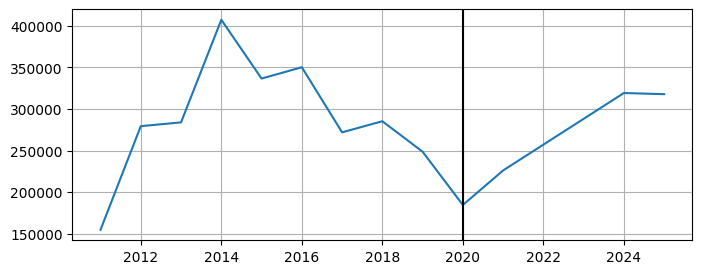

In [105]:
plt.figure(figsize=(8,3))
plt.plot([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       #2022, 2023, 
          2024, 2025],avv)
plt.grid()
plt.axvline(2020, c='k')

<Axes: xlabel='Start Date'>

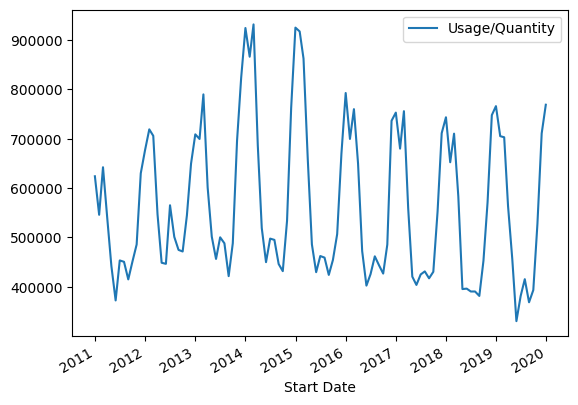

In [128]:
Natural_Gas[Natural_Gas.Year<2020].plot(x='Start Date',y='Usage/Quantity')

<Axes: xlabel='Start Date'>

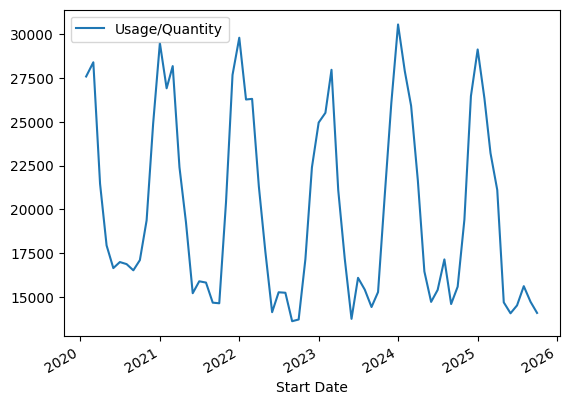

In [114]:
Natural_Gas[Natural_Gas.Year>=2020].plot(x='Start Date',y='Usage/Quantity')